In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
pd.options.display.max_columns = None

In [26]:
# Colunas que interessam para a análise
colunas = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO','CO_UF_ESC', 
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

df_microdados = pd.read_csv('DADOS/MICRODADOS_ENEM_2021.csv', encoding='latin-1', sep=';', usecols=colunas)

In [27]:
# Renomeando as colunas com detalhes socioeconomicos de forma a ficarem mais legiveis
new_column_names = {
    'Q001': 'ESCOLARIDADE_PAI',
    'Q002': 'ESCOLARIDADE_MAE',
    'Q003': 'OCUPACAO_PAI',
    'Q004': 'OCUPACAO_MAE',
    'Q005': 'QUANT_PESSOAS_RESIDENCIA',
    'Q006': 'RENDA_MENSAL',
    'Q007': 'EMPREGADO_DOMESTICO',
    'Q008': 'QUANT_BANHEIROS',
    'Q009': 'QUANT_QUARTOS',
    'Q010': 'QUANT_CARROS',
    'Q011': 'QUANT_MOTOS',
    'Q012': 'QUANT_GELADEIRA',
    'Q013': 'QUANT_FREEZER',
    'Q014': 'QUANT_MAQUINA_LAVAR',
    'Q015': 'QUANT_SECADORA',
    'Q016': 'QUANT_MICROONDAS',
    'Q017': 'QUANT_MAQ_LAVAR_LOUCA',
    'Q018': 'QUANT_ASPIRADOR_PO',
    'Q019': 'QUANT_TV_CORES',
    'Q020': 'QUANT_APARELHO_DVD',
    'Q021': 'POSSUI_TV_ASSINATURA',
    'Q022': 'QUANT_CELULAR',
    'Q023': 'POSSUI_TELEFONE_FIXO',
    'Q024': 'QUANT_COMPUTADOR',
    'Q025': 'POSSUI_ACESSO_INTERNET'
}

df_microdados.rename(columns=new_column_names, inplace=True)


In [28]:

df_microdados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']] = df_microdados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].apply(pd.to_numeric, errors='coerce')

# Definindo a nota final
df_microdados['NOTA_FINAL'] = (df_microdados['NU_NOTA_CN'] + df_microdados['NU_NOTA_CH'] + df_microdados['NU_NOTA_LC'] + df_microdados['NU_NOTA_MT'] + df_microdados['NU_NOTA_REDACAO']) / 5


In [29]:
#Convertendo dados categóricos para numéricos
df_microdados['QUANT_BANHEIROS'] = df_microdados['QUANT_BANHEIROS'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_QUARTOS'] = df_microdados['QUANT_QUARTOS'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_CARROS'] = df_microdados['QUANT_CARROS'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_MOTOS'] = df_microdados['QUANT_MOTOS'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_GELADEIRA'] = df_microdados['QUANT_GELADEIRA'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_FREEZER'] = df_microdados['QUANT_FREEZER'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_MAQUINA_LAVAR'] = df_microdados['QUANT_MAQUINA_LAVAR'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_SECADORA'] = df_microdados['QUANT_SECADORA'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_MICROONDAS'] = df_microdados['QUANT_MICROONDAS'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_MAQ_LAVAR_LOUCA'] = df_microdados['QUANT_MAQ_LAVAR_LOUCA'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_ASPIRADOR_PO'] = df_microdados['QUANT_ASPIRADOR_PO'].replace({
    'A': '0',
    'B': '1'
    })

df_microdados['QUANT_TV_CORES'] = df_microdados['QUANT_TV_CORES'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_APARELHO_DVD'] = df_microdados['QUANT_APARELHO_DVD'].replace({
    'A': '0',
    'B': '1'
    })

df_microdados['POSSUI_TV_ASSINATURA'] = df_microdados['POSSUI_TV_ASSINATURA'].replace({
    'A': '0',
    'B': '1'
    })

df_microdados['QUANT_CELULAR'] = df_microdados['QUANT_CELULAR'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['QUANT_COMPUTADOR'] = df_microdados['QUANT_COMPUTADOR'].replace({
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3',
    'E': '4'
    })

df_microdados['POSSUI_TELEFONE_FIXO'] = df_microdados['POSSUI_TELEFONE_FIXO'].replace({
    'A': '0',
    'B': '1'
    })

df_microdados['POSSUI_ACESSO_INTERNET'] = df_microdados['POSSUI_ACESSO_INTERNET'].replace({
    'A': '0',
    'B': '1'
    })

df_microdados = df_microdados.dropna()

categorical_columns = ['ESCOLARIDADE_PAI', 'ESCOLARIDADE_MAE','OCUPACAO_PAI', 'OCUPACAO_MAE','RENDA_MENSAL','EMPREGADO_DOMESTICO']  

df_microdados = pd.get_dummies(df_microdados, columns=categorical_columns)


In [30]:
# Maiores notas em cada categoria
subset_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','NOTA_FINAL']

max_values_subset = df_microdados[subset_columns].max()

max_values_subset

NU_NOTA_CN          848.7
NU_NOTA_CH          846.9
NU_NOTA_LC          820.5
NU_NOTA_MT          953.1
NU_NOTA_REDACAO    1000.0
NOTA_FINAL          846.1
dtype: float64

In [31]:
# Menores notas em cada categoria
min_values_subset = df_microdados[subset_columns].min()

min_values_subset

NU_NOTA_CN         0.0
NU_NOTA_CH         0.0
NU_NOTA_LC         0.0
NU_NOTA_MT         0.0
NU_NOTA_REDACAO    0.0
NOTA_FINAL         0.0
dtype: float64

In [32]:
# Média das notas em cada categoria
mean_values_subset = df_microdados[subset_columns].mean()

mean_values_subset

NU_NOTA_CN         493.745182
NU_NOTA_CH         523.062892
NU_NOTA_LC         507.251333
NU_NOTA_MT         544.606337
NU_NOTA_REDACAO    629.684374
NOTA_FINAL         539.670024
dtype: float64

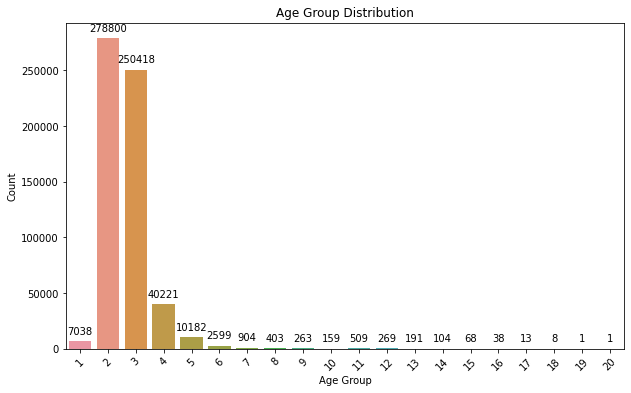

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='TP_FAIXA_ETARIA', data=df_microdados)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

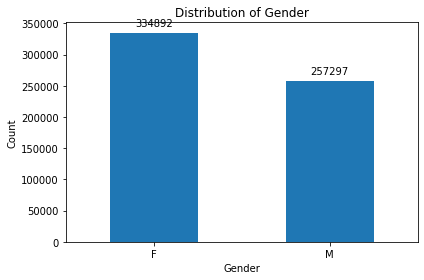

In [36]:
gender_counts = df_microdados['TP_SEXO'].value_counts()

if not gender_counts.empty:
    gender_counts_df = gender_counts.rename_axis('Gender').reset_index(name='Count')

    ax = gender_counts_df.plot(kind='bar', x='Gender', y='Count', legend=False)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')

    plt.title('Distribution of Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  
    plt.tight_layout()
    plt.show()

In [44]:
df_microdados['TP_SEXO'] = df_microdados['TP_SEXO'].map({'M': 1, 'F': 0})

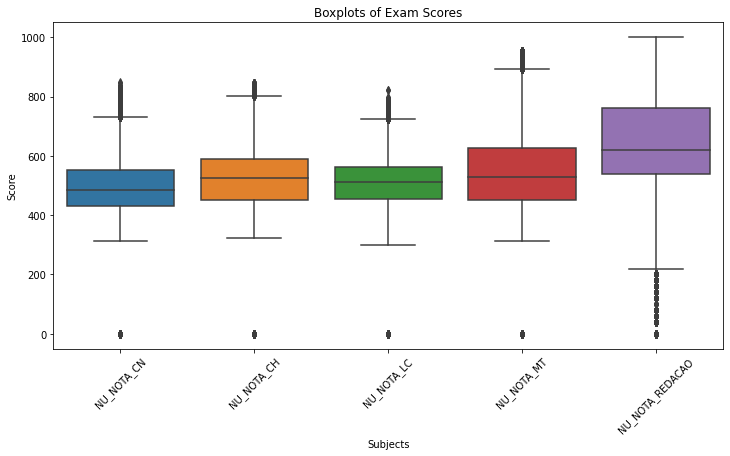

In [37]:
numerical_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_microdados[numerical_columns])
plt.title('Boxplots of Exam Scores')
plt.ylabel('Score')
plt.xlabel('Subjects')
plt.xticks(rotation=45)
plt.show()

In [45]:
X = df_microdados.drop('NOTA_FINAL', axis=1)
y = df_microdados['NOTA_FINAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

LinearRegression()

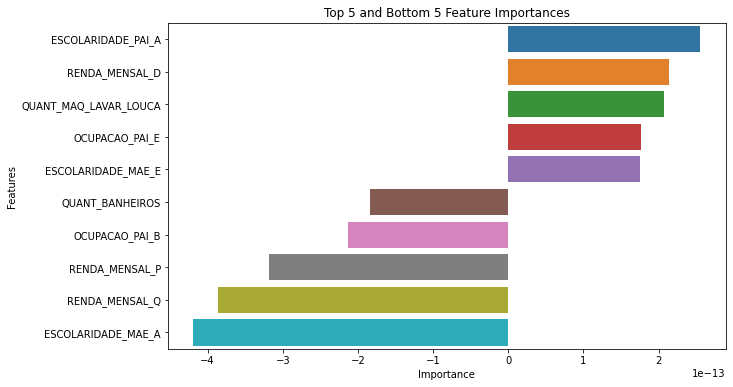

In [47]:
# Predict target values using the trained logistic regression model on the training data
y_pred = modelo_lr.predict(X_train)

# Retrieve the coefficients of the logistic regression model
coefficients = modelo_lr.coef_

# Create a DataFrame to store feature importances with their respective feature names
# Sort the DataFrame by importance values in descending order
feature_importances = pd.DataFrame(coefficients, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Display the top 10 features based on their importance
feature_importances.head(10)

# Set the number of top features to exclude from the analysis
n = 5

# Drop the top n features (most important ones) from the feature importances DataFrame
feature_importances.drop(feature_importances.head(n).index, inplace=True)

# Select the next top 5 features after excluding the initial top n features
top_5_features = feature_importances.head(5)

# Select the bottom 5 features with the least importance
bottom_5_features = feature_importances.tail(5)

# Concatenate the top 5 and bottom 5 features into a single DataFrame
top_bottom_features = pd.concat([top_5_features, bottom_5_features])

# Plot the importances of the top 5 and bottom 5 features using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_bottom_features.index, x=top_bottom_features['Importance'])
plt.title('Top 5 and Bottom 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


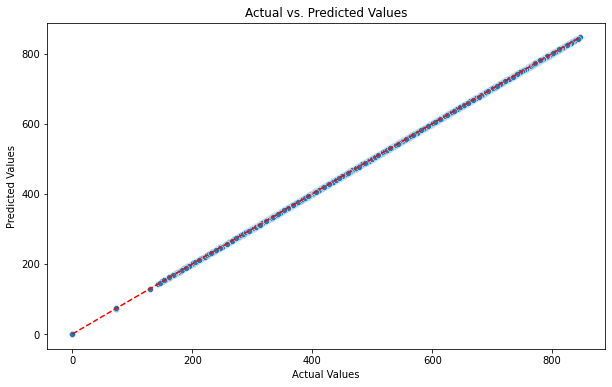

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
differences = y_train - y_pred

above_line = np.sum(differences < 0)
below_line = np.sum(differences > 0)
on_line = np.sum(differences == 0)

total_points = len(differences)

percent_above_line = (above_line / total_points) * 100
percent_below_line = (below_line / total_points) * 100
percent_on_line = (on_line / total_points) * 100

print("Percentage of Points Above the Line:", percent_above_line)
print("Percentage of Points Below the Line:", percent_below_line)
print("Percentage of Points On the Line:", percent_on_line)

Percentage of Points Above the Line: 35.314965034374595
Percentage of Points Below the Line: 54.687166887246676
Percentage of Points On the Line: 9.997868078378726


In [ ]:
# Performing cross-validation
cv_scores = cross_val_score(modelo_lr, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean Cross-Validation R^2:", np.mean(cv_scores))


Cross-Validation R^2 Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation R^2: 1.0
